## K Nearest Neighbours : Classification Problem

## Part 2

* Below is the code implementation of distance weighted KNN for k = 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clyent import color
from sklearn.neighbors import KNeighborsClassifier
                              



class KNearestNeighbours:
    def __init__(self, __trainingDataFile, __testDataFile):

        self.trainingDataFile = __trainingDataFile
        self.testDataFile = __testDataFile
        self.trainingData = np.array([])
        self.testData = np.array([])
        self.euclideanDistances = np.array([])
        self.euclideanDistancesSorted = np.array([])
        self.readInstances()

    def readInstances(self):

        self.trainingData = np.genfromtxt(self.trainingDataFile, delimiter=',', dtype=float)
        self.testData = np.genfromtxt(self.testDataFile, delimiter=',', dtype=float)

    def viewData(self):
        self.updateDistances()
        
    '''This methods recieves all the training instances, Returns the distance between the single point query
    every training instance. Also return the distances in the sorted manner''' 

    def calculateDistances(self, trainingInstancesMatrix, singlQueryPoint):
        data = np.sqrt(np.sum((trainingInstancesMatrix - singlQueryPoint) ** 2, axis=1))
        sorted_data = np.argsort(data)
        return data, sorted_data

    def updateDistances(self):
        distances = []
        sortedDistances = []
        for i in range(0, np.shape(self.testData)[0]):
            d, sd = self.calculateDistances(self.trainingData[:, :-1], self.testData[i, :-1])
            distances.append(d)
            sortedDistances.append(sd)
            i += 1
        self.euclideanDistances = np.array(distances)
        self.euclideanDistancesSorted = np.array(sortedDistances)

    def CountFrequency(self, my_list):
        '''Returns the value of the majority neighbours '''

        freq = {}
        for item in my_list:
            if (item in freq):
                freq[item] += 1
            else:
                freq[item] = 1
        i = 0
        max_count = 0
        for key, value in freq.items():
            if value > i:
                i = value
                max_count = key
        return max_count

    def calculate_accuracy(self, expected_results, predicted_results):
        indexes = np.where(expected_results == predicted_results)
        # print(indexes)
        # print(len(indexes[0]))
        good_pred_count = len(indexes[0])
        accuracy = (good_pred_count / np.shape(kNearestNeighbours.testData)[0]) * 100
        return accuracy

    def generate_pred_based_on_weightedDistance(self, results, euclidean_distance_of_neighbours):
        zero_pt_indexes = np.where(results == 0.)
        one_pt_indexes = np.where(results == 1.)
        two_pt_indexes = np.where(results == 2.)
        list_sums = []
        inverted_euclidean_distance_of_neighbours = 1 / euclidean_distance_of_neighbours
        zero_sum = np.sum(inverted_euclidean_distance_of_neighbours[zero_pt_indexes])
        one_sum = np.sum(inverted_euclidean_distance_of_neighbours[one_pt_indexes])
        two_sum = np.sum(inverted_euclidean_distance_of_neighbours[two_pt_indexes])
        list_sums = [zero_sum, one_sum, two_sum]
        index_of_max_sum = list_sums.index(max(list_sums))

        if index_of_max_sum == 0:
            return 0.

        elif index_of_max_sum == 1:
            return 1.

        elif index_of_max_sum == 2:
            return 2.


kNearestNeighbours = KNearestNeighbours("trainingData.csv", "testData.csv")
kNearestNeighbours.viewData()

# Select the number of neighbours
k = 10

'''Find the euclidean distance from each instance in test data and find the nearest train instances'''

predicted_results = []
predicted_results_based_on_weightedDistance = []
for indexToBe_searched in range(np.shape(kNearestNeighbours.testData)[0]):
    list_of_neighbours = kNearestNeighbours.euclideanDistancesSorted[indexToBe_searched][:k]
    results = []
    euclidean_distance_of_neighbours = []
    for neighbour in list_of_neighbours:
        '''Finding the labelled class of each of the neighbouring training instances'''
        result = kNearestNeighbours.trainingData[neighbour][-1:]

        '''Find the distances between the target instance and the neighbours for weighted distance calculations'''
        euclidean_distance_of_neighbour = kNearestNeighbours.euclideanDistances[indexToBe_searched][neighbour]

        '''Find the result for each neighbour'''
        results.append(float(result))

        euclidean_distance_of_neighbours.append(float(euclidean_distance_of_neighbour))

    predicted_results_based_on_weightedDistance.append([kNearestNeighbours.generate_pred_based_on_weightedDistance(
        np.array(results), np.array(euclidean_distance_of_neighbours))])

'''Append the obtained prediction results to the test data for convenience'''
final_test_result = np.append(kNearestNeighbours.testData, predicted_results_based_on_weightedDistance, axis=1)

'''Calculate accuracy based on predictions'''
accuracy_by_distance_weighted = kNearestNeighbours.calculate_accuracy(final_test_result[:, [-2]],
                                                                      final_test_result[:, [-1]])


print('KNN Distance Weighted -Classification for k={} accuracy ==>{}'.format(k,accuracy_by_distance_weighted))

KNN Distance Weighted -Classification for k=10 accuracy ==>92.7


* The above code provides an accuracy of 92.7% for k=10

## Part 2 (B)- Improving the accuracy of the model

Max Accuracy Normal =93.10000000000001  Distance Weighted=93.0


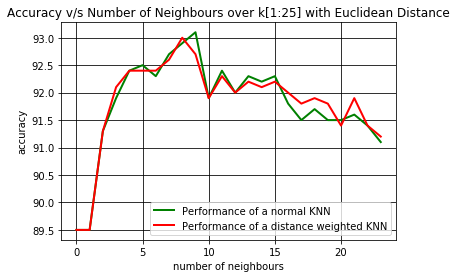

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from clyent import color


class KNearestNeighbours:
    def __init__(self, __trainingDataFile, __testDataFile, a_factor=3, algoName=1):
        self.a_factor = a_factor
        self.weight = 10000
        self.trainingDataFile = __trainingDataFile
        self.testDataFile = __testDataFile
        self.trainingData = np.array([])
        self.testData = np.array([])
        self.distances = np.array([])
        self.sortedDistances = np.array([])
        self.algoName = algoName
        self.readInstances()

    def readInstances(self):
        self.trainingData = np.genfromtxt(self.trainingDataFile, delimiter=',', dtype=float)
        self.testData = np.genfromtxt(self.testDataFile, delimiter=',', dtype=float)

    def viewData(self):
        self.updateDistances()

    def calculateDistances(self, trainingInstancesMatrix, singlQueryPoint):
        if self.algoName == 3:
            data, sorted_data = self.calculateDistances_minowski(trainingInstancesMatrix, singlQueryPoint)
            return data, sorted_data

        elif self.algoName == 2:
            data, sorted_data = self.calculateDistances_manhattan(trainingInstancesMatrix, singlQueryPoint)
            return data, sorted_data

        elif self.algoName == 1:
            data, sorted_data = self.calculateDistances_Euclidean(trainingInstancesMatrix, singlQueryPoint)
            return data, sorted_data

    def calculateDistances_Euclidean(self, trainingInstancesMatrix, singlQueryPoint):
        data = np.sqrt(np.sum((trainingInstancesMatrix - singlQueryPoint) ** 2, axis=1))
        sorted_data = np.argsort(data)
        return data, sorted_data

    def calculateDistances_minowski(self, trainingInstancesMatrix, singlQueryPoint):
        mink_sum = np.sum(np.power(np.absolute(trainingInstancesMatrix - singlQueryPoint), kNearestNeighbours.a_factor),
                          axis=1)
        data = np.power(mink_sum, (1 / kNearestNeighbours.a_factor))
        sorted_data = np.argsort(data)
        return data, sorted_data

    def calculateDistances_manhattan(self, trainingInstancesMatrix, singlQueryPoint):
        data = np.sum(np.absolute(trainingInstancesMatrix - singlQueryPoint), axis=1)
        sorted_data = np.argsort(data)
        return data, sorted_data

    def updateDistances(self):
        distances = []
        sortedDistances = []
        for i in range(0, np.shape(self.testData)[0]):
            d, sd = self.calculateDistances(self.trainingData[:, :-1], self.testData[i, :-1])
            distances.append(d)
            sortedDistances.append(sd)
            i += 1
        self.distances = np.array(distances)
        self.sortedDistances = np.array(sortedDistances)

    def CountFrequency(self, my_list):
        '''Returns the value of the majority neighbours'''
        freq = {}
        for item in my_list:
            if (item in freq):
                freq[item] += 1
            else:
                freq[item] = 1
        i = 0
        max_count = 0
        for key, value in freq.items():
            if value > i:
                i = value
                max_count = key
        return max_count

    def calculate_accuracy(self, expected_results, predicted_results):
        indexes = np.where(expected_results == predicted_results)

        good_pred_count = len(indexes[0])
        accuracy = (good_pred_count / np.shape(kNearestNeighbours.testData)[0]) * 100
        return accuracy

    def generate_pred_based_on_weightedDistance(self, results, euclidean_distance_of_neighbours):
        '''Find all the indices belonging to class 0,1,2 '''
        zero_pt_indexes = np.where(results == 0.)
        one_pt_indexes = np.where(results == 1.)
        two_pt_indexes = np.where(results == 2.)
        
        '''Since this is a minimization problem , invert all the distances'''
        inverted_euclidean_distance_of_neighbours = 1 / euclidean_distance_of_neighbours
        
        '''Find the sum of distances of each class '''
        zero_sum = np.sum(inverted_euclidean_distance_of_neighbours[zero_pt_indexes])
        one_sum = np.sum(inverted_euclidean_distance_of_neighbours[one_pt_indexes])
        two_sum = np.sum(inverted_euclidean_distance_of_neighbours[two_pt_indexes])
        list_sums = [zero_sum, one_sum, two_sum]
        
        '''Indentify the nearest class of neighbours'''
        index_of_max_sum = list_sums.index(max(list_sums))

        if index_of_max_sum == 0:
            return 0.

        elif index_of_max_sum == 1:
            return 1.

        elif index_of_max_sum == 2:
            return 2.


'''**********************************************Do your Configurations Here *******************************************************************************'''
'''Possible Algo Codes : 
        1==Euclidean
        2==Manhattan
        3==Minowski'''
kNearestNeighbours = KNearestNeighbours("trainingData.csv", "testData.csv",a_factor=1,algoName=1)
kNearestNeighbours.viewData()
'''*********************************************************************************************************************************************************'''






'''where the prediction result of each test instance will be stored'''
accuracies_by_majority = []
accuracies_by_distance_weighted = []

'''Find the euclidean distance from each instance in test data and find the nearest train instances'''

'''Run for multiple values of k'''
for k in range(1, 25):
    predicted_results = []
    predicted_results_based_on_weightedDistance = []
    for indexToBe_searched in range(np.shape(kNearestNeighbours.testData)[0]):
        list_of_neighbours = kNearestNeighbours.sortedDistances[indexToBe_searched][:k]

        # print('Here is the list of closest indexes:',lis_of_closest_index)
        results = []
        euclidean_distance_of_neighbours = []
        for neighbour in list_of_neighbours:
            result = kNearestNeighbours.trainingData[neighbour][-1:]

            '''Find the distances between the target instance and the neighbours for weighted distance calculations'''
            euclidean_distance_of_neighbour = kNearestNeighbours.distances[indexToBe_searched][neighbour]

            '''Find the result for each neighbour'''
            results.append(float(result))

            euclidean_distance_of_neighbours.append(float(euclidean_distance_of_neighbour))

        # print('Here are the results:',results)

        '''predict the result based on majority'''
        predicted_results.append([kNearestNeighbours.CountFrequency(results)])

        predicted_results_based_on_weightedDistance.append(
            [kNearestNeighbours.generate_pred_based_on_weightedDistance(np.array(results),
                                                                        np.array(euclidean_distance_of_neighbours))])

    '''Append the obtained prediction results to the test data for convenience'''
    final_test_result = np.append(kNearestNeighbours.testData, predicted_results, axis=1)
    final_test_result = np.append(final_test_result, predicted_results_based_on_weightedDistance, axis=1)

    '''Caluclating the accuracy of predications for both Normal KNN and Distance Weighted KNN'''
    accuracy_by_majority = kNearestNeighbours.calculate_accuracy(final_test_result[:, [-3]], final_test_result[:, [-2]])
    accuracy_by_distance_weighted = kNearestNeighbours.calculate_accuracy(final_test_result[:, [-3]],
                                                                          final_test_result[:, [-1]])
    accuracies_by_majority.append(accuracy_by_majority)
    accuracies_by_distance_weighted.append(accuracy_by_distance_weighted)

'''Plotting the graphs'''
print('Max Accuracy Normal ={}  Distance Weighted={}'.format(max(accuracies_by_majority) , max(accuracies_by_distance_weighted)))
plt.plot(accuracies_by_majority, 'g', label='Performance of a normal KNN', linewidth=2)
plt.plot(accuracies_by_distance_weighted, 'r', label='Performance of a distance weighted KNN', linewidth=2)
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')
plt.title('Accuracy v/s Number of Neighbours over k[1:25] with Euclidean Distance')
plt.legend()
plt.grid(True, color='k')
plt.show()


## Below graph shows the accuracy performance of normal KNN over Distance Weighted KNN for various   Distance Measurement techniques

* **Manhattan Distance**

<img src="https://www.dropbox.com/s/b5wio85nqazwnps/KNN_over_DistanceWeighted__Classsification_Accuracy_Performance_Manhattan.png?raw=1" alt="data1" border="0">

* **Minowski**


* **Plotting Minowski at a A factor Range from 3 to 20 for k=10**

<img src="https://www.dropbox.com/s/tjamti3i8bx0ebu/peformance_Minnowski_overVarious_AFactor.jpg?raw=1" alt="data1" border="0">

* **As from the above graph it is evident that Minowksi gives most optimal results for A-factor =3**


* **Plotting the below graph of Minowski for Normal v/s Distance Weighted KNN at A-Factor=3**

<img src="https://www.dropbox.com/s/204ze9z83z8pqhq/KNN_over_DistanceWeighted__Classsification_Accuracy_Performance_Minowski.png?raw=1" alt="data1" border="0">

* **Euclidean**

<img src="https://www.dropbox.com/s/xasjye09kxado1r/KNN_over_DistanceWeighted__Classsification_Accuracy_Performance_Euclidean.png?raw=1" alt="data1" border="0">


## From the above observations we conclude that below hyper params that would provide the most optimal result
* Since we have found very comparable results for both Normal KNN[93.1% at K=10] and Distance Weighted KNN[93% at K=9] we can further evaluate both the algorithms with more test data.


* Normal KNN
    * **Accuracy**            : 93.1
    * **Distance Algorithm**  : Euclidean
    * **Value of K**          : 10
    
* Distance Weighted KNN
    * **Accuracy**            : 93.0
    * **Distance Algorithm**  : Euclidean
    * **Value of K**          : 9
    

## Doing it!! The efficient way

## Grid Search

* Above is a manual way of finding the right set of Hyper Params that would provide most optimum results.However, The same can be used using a feature of SCIKITLEARN libraby callled as GRID SEARCH. 

* As shown below ,using this feature we can pass all the possible values of Hyper params and allow the library to analyze which set of Hyper Params would yeild the most optimum results.

* Below are the KNN hyper params offered by sklearn.modelselection gridsearch:

    * **n_neighbors** - here we can pass a list of  neighbour count we want to test.

    * **weights**  - Which can be set to 'uniform'or 'distace'.'Uniform' will consider the normal KNN where as       'distance' shall consider the distance weighted KNN.

    * **metric** - This gives us a choice of which distance evaluation metric is to used among - Euclidean,Minowski and Manhattan


* Below are the number of choices available for each param :
n_neighbors = 5
weights		= 2
metric		= 2

* based of above numbers the grid search shall generate 20 (5*2*2=20) combinations and shall return us the most optimum set of hyper params.


Below is how one can evaluate the best

* Pass the various values of the KNN hyper params in a dictionary

In [3]:
from sklearn.model_selection import GridSearchCV

grid_parameters = {
    'n_neighbors': [1, 2, 4, 6, 8, 10],
    'weights': ['unifrom', 'distance'],

    'metric': ['manhattan', 'euclidean']

}

* Provide the name of the classsifier,The params we created above,
  cv=cross validation which states the number of times you wan tot perform croos validation(higher the better)
  n_jobs= with -1 we ask the library to utilize all the machine resources to speed up the computation.  

In [5]:

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    grid_parameters,
    verbose=1,
    cv=1,
    n_jobs=-1
)


In [6]:
gs_results = grid_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

* below lines can be used to analyze the results generated by the grid search.